<a href="https://colab.research.google.com/github/drpetros11111/IBM_ML_Coursera/blob/IBM-KNN-Training/IBM_ML_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**0_Introduction and Learning Goals¶**
In this lab, we will explore classification using the K-Nearest Neighbors approach. We will use a customer churn dataset from the telecom industry, which includes customer data such as long-distance usage, data usage, monthly revenue, types of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, includes several Excel files which have been combined and are available in the course materials. We are using the subset of customers who have phone accounts. Since the data includes a mix of numeric, categorical, and ordinal variables, we will load this data and do some preprocessing. Then we will use K-nearest neighbors to predict customer churn rates.

After completing this lab, you should have a working understanding of how to preprocess a variety of variables to apply the K-Nearest Neighbors algorithm, understand how to choose K, and understand how to evaluate model performance.

# 1_Importing the LIbraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2_Importing the Dataset

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")

In [3]:
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


#3_Perform EDA
We begin by importing the data. Examine the columns and data.
Notice that the data contains a unique ID, an indicator for phone customer status, total lifetime value, total revenue, and a bank-estimated churn score. We will not be using these features, so they can be dropped from the data.
Begin by taking an initial look at the data, including both numeric and non-numeric features.

##3.1_Perform Descriptive Statistics on the dataset

In [4]:
round(df.describe(), 2)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.43,0.42,0.24,0.29,0.34,0.34,0.29,0.67,0.38,0.59,...,0.39,0.05,0.23,0.43,0.22,0.07,0.12,0.06,0.09,0.11
std,0.40,0.49,0.24,0.45,0.48,0.48,0.45,0.47,0.42,0.49,...,0.49,0.23,0.42,0.50,0.41,0.26,0.32,0.24,0.28,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.25,0.00,0.20,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.75,1.00,0.32,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


###3.2_Identify the Variables data types and their unique values
Identify which variables are binary, categorical and not ordinal, categorical and ordinal, and numeric. The non-numeric features will need to be encoded using methods we have discussed in the course.
Start by identifying the number of unique values each variable takes, then create list variables for categorical, numeric, binary, and ordinal variables.
Note that the variable 'months' can be treated as numeric, but it may be more convenient to transform it to an ordinal variable.
For the other categorical variables, examine their values to determine which may be encoded ordinally.

In [10]:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
months,5
multiple,2
gb_mon,50
security,2
backup,2
protection,2
support,2
unlimited,2
contract,3


####**Explanation of the 3.2**
The given code snippet is using the pandas library to create a DataFrame named df_uniques. Let's break down the code step by step:

**[[i, len(df[i].unique())] for i in df.columns]**

This part of the code uses a list comprehension to
iterate over the columns of a DataFrame df.
-For each column i, it creates a list containing two elements:
the column name i and the number of unique values in that column, which is obtained by calling df[i].unique() and then calculating the length of the resulting array using len().
-The output is a list of lists, where each inner list contains the column name and the count of unique values for that column.

**columns=['Variable', 'Unique Values']**
This part specifies the column names for the resulting DataFrame.
-The first column is named 'Variable' and will contain the column names from the original DataFrame df.
-The second column is named 'Unique Values' and will contain the counts of unique values.

.set_index('Variable')
This method call sets the 'Variable' column as the index of the DataFrame df_uniques. This means that the 'Variable' column will be used as the row labels in the resulting DataFrame.

So, overall, the code creates a new DataFrame df_uniques that displays the unique value counts for each column in the original DataFrame df. The 'Variable' column contains the names of the columns, and the 'Unique Values' column contains the corresponding counts of unique values for each column. The resulting DataFrame has 'Variable' as its index.

**Note: Double Square Brackets**
In Python, the double square brackets [[ ... ]] represent a nested list. A nested list is a list that contains other lists as its elements.

In the context of the code snippet you provided, [[i, len(df[i].unique())] for i in df.columns] is a list comprehension that creates a nested list. It iterates over the columns of the DataFrame df and generates a list with two elements for each column. The first element is i, which represents the column name, and the second element is len(df[i].unique()), which represents the count of unique values in that column.

For example, if df has three columns ['A', 'B', 'C'], the list comprehension will generate a nested list like this:

**bold text**[
  ['A', unique_values_A],
  ['B', unique_values_B],
  ['C', unique_values_C]
**bold text**]

Here, unique_values_A, unique_values_B, and unique_values_C represent the counts of unique values in columns 'A', 'B', and 'C' respectively.

The resulting nested list is then used to create a DataFrame using the pandas library, with 'Variable' and 'Unique Values' as column names

###3.3 Identifying Binary Categorical Variables

In [6]:
binary_variables = list(df_uniques[df_uniques['Unique Values']== 2].index)
binary_variables

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value',
 'payment_Credit Card',
 'payment_Mailed Check',
 'internet_type_DSL',
 'internet_type_Fiber Optic',
 'internet_type_None',
 'offer_Offer A',
 'offer_Offer B',
 'offer_Offer C',
 'offer_Offer D',
 'offer_Offer E']

###3.3_Explanation
The given code snippet is selecting binary variables from a DataFrame df_uniques based on a condition. Let's break down the code step by step:

**df_uniques['Unique Values'] == 2**
This part of the code checks a condition for each row in the 'Unique Values' column of the DataFrame df_uniques. It returns a boolean Series where True indicates that the corresponding row has a value of 2 in the 'Unique Values' column and False otherwise.


**df_uniques[df_uniques['Unique Values'] == 2]**
This code uses the boolean Series as a filter to select rows from the DataFrame df_uniques. It returns a new DataFrame containing only the rows where the condition is True. In other words, it filters the DataFrame to include only the rows where the 'Unique Values' column has a value of 2.

list(df_uniques[df_uniques['Unique Values'] == 2].index)
This part retrieves the index values of the filtered DataFrame and converts them into a list. The index attribute of a DataFrame represents the row labels or the index values of the DataFrame. By applying the list() function, the index values are converted into a Python list.

Therefore, the overall purpose of the code is to identify binary variables from the DataFrame df_uniques. It looks for rows in df_uniques where the 'Unique Values' column has a value of 2, indicating that those variables have only two distinct values. The resulting list, stored in binary_variables, contains the index values (column names) of the binary variables.

**Note**
The reason for using df_uniques[df_uniques['Unique Values'] == 2] with double brackets is to perform boolean indexing in pandas.

In pandas, boolean indexing allows you to select specific rows from a DataFrame based on a boolean condition. The condition is applied to the DataFrame, resulting in a boolean Series where each element represents whether the corresponding row satisfies the condition or not.

In the given snippet, df_uniques['Unique Values'] == 2 creates a boolean Series by comparing each value in the 'Unique Values' column of the DataFrame df_uniques to the value 2. The resulting boolean Series has True for rows where the condition is satisfied (i.e., where the 'Unique Values' column equals 2) and False for rows that do not satisfy the condition.

To select the rows that satisfy the condition, we use this boolean Series as an index for the DataFrame df_uniques. By enclosing df_uniques['Unique Values'] == 2 within the square brackets [], we use it as a filter to select only the rows of df_uniques where the condition is True.

Thus, the expression df_uniques[df_uniques['Unique Values'] == 2] returns a new DataFrame that includes only the rows where the 'Unique Values' column has a value of 2. The double brackets are used to denote the boolean indexing operation and select the desired rows based on the condition

###3_4. Identifying categorical variables that they are not binary

In [7]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['months', 'contract', 'satisfaction']

###3_4. Eplanation
The given code snippet is selecting categorical variables from a DataFrame df_uniques based on certain conditions. Let's break it down step by step:

**(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)**
This part of the code creates a boolean Series by evaluating two conditions using logical operators. It checks if the values in the 'Unique Values' column of the DataFrame df_uniques satisfy both conditions: (1) they are greater than 2 and (2) they are less than or equal to 6. The result is a boolean Series where True indicates that the corresponding row satisfies both conditions, and False otherwise.

**df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)]**
This code uses the boolean Series as a filter to select rows from the DataFrame df_uniques. It returns a new DataFrame containing only the rows where both conditions are True. In other words, it filters the DataFrame to include only the rows where the 'Unique Values' column has a value greater than 2 and less than or equal to 6.

**list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)**
This part retrieves the index values (column names) of the filtered DataFrame and converts them into a list. The index attribute of a DataFrame represents the row labels or the index values of the DataFrame. By applying the list() function, the index values are converted into a Python list.

In summary, the code selects categorical variables from the DataFrame df_uniques based on specific conditions. It filters the DataFrame to include only the rows where the 'Unique Values' column has a value greater than 2 and less than or equal to 6. The resulting list, stored in categorical_variables, contains the index values (column names) of the categorical variables.

###3_5. Creating lists of non-binary categorical variables with their unique values

In [9]:
[[i, list(df[i].unique())] for i in categorical_variables]

[['months', [0.0, 0.25, 0.5, 1.0, 0.75]],
 ['contract', [0.0, 0.5, 1.0]],
 ['satisfaction', [0.5, 0.25, 0.0, 0.75, 1.0]]]

###3_5. Explanation
The code snippet [[i, list(df[i].unique())] for i in categorical_variables] uses a list comprehension to create a nested list that contains the column names and unique values of categorical variables in the DataFrame df. Let's break it down:

**[i, list(df[i].unique())]**
This part of the code creates an inner list for each categorical variable i in categorical_variables. Each inner list consists of two elements: the variable name i and a list of its unique values obtained by calling df[i].unique().

**for i in categorical_variables**
This loop iterates over each categorical variable i in the list categorical_variables.


**[[i, list(df[i].unique())] for i in categorical_variables]**
This is the list comprehension statement that combines the above two parts. It creates a nested list by iterating over each categorical variable in categorical_variables and generating the inner list for each variable.

Overall, the code generates a nested list that represents the categorical variables in the DataFrame df along with their unique values. Each inner list contains the variable name (column name) and a list of its unique values. The resulting nested list provides a summary of the categorical variables and their distinct values in the DataFrame.

**Note**
The use of double brackets [[i, list(df[i].unique())] for i in categorical_variables] in the given code snippet is related to the creation of a nested list using a list comprehension.

In Python, double brackets [[ ... ]] are used to create a nested list. A nested list is a list that contains other lists as its elements. It allows for a hierarchical structure where each inner list represents a separate entity within the outer list.

In the context of the code snippet above:

**[[i, list(df[i].unique())] for i in categorical_variables]**
This code uses a list comprehension to iterate over the categorical variables in the categorical_variables list. For each categorical variable i, it creates an inner list with two elements: the variable name i and a list of its unique values obtained by calling **df[i].unique()**.

The resulting list comprehension generates a nested list where each inner list represents a categorical variable along with its unique values. The outer list contains all these inner lists, providing a summary of the categorical variables and their corresponding unique values.

To summarize, **the double brackets [[ ... ]]** in the code snippet are used to indicate the creation of a nested list. Each inner list represents a categorical variable and its unique values, and the outer list contains all these inner lists, forming a hierarchical structure of categorical variables and their information.


###3_6. Defining Ordinal cateogrical variable

In [13]:
ordinal_variables =['contact', 'satisfaction']

In [15]:
df['months'].unique()

array([0.  , 0.25, 0.5 , 1.  , 0.75])

In [ ]:
ordinal_variables.append('months')

###3_7. Identifying the numerical variables

In [16]:
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

###3_7. Explanation
The given code snippet numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables)) is used to identify the numeric variables in a DataFrame df based on the given sets of variables.

Let's break it down step by step:

set(df.columns): This part retrieves a set of all the column names in the DataFrame df. The df.columns attribute returns a list of column names, and by applying set(), it is converted into a set to remove any duplicates.

- set(ordinal_variables): Here, the set of ordinal_variables is subtracted from the set of all column names. It removes the elements present in ordinal_variables from the set obtained in the previous step. This step eliminates the ordinal variables from consideration.

- set(categorical_variables): Similarly, the set of categorical_variables is subtracted from the result of the previous step. It removes the elements present in categorical_variables from the remaining set. This step eliminates the categorical variables from consideration.

- set(binary_variables): The set of binary_variables is subtracted from the result of the previous step. It removes the elements present in binary_variables from the remaining set. This step eliminates the binary variables from consideration.

list(...): Finally, the resulting set is converted back to a list using the list() function, storing it in the numeric_variables variable. The numeric_variables list contains the column names of the variables that are not present in ordinal_variables, categorical_variables, or binary_variables. Thus, it represents the numeric variables present in the DataFrame df.

In summary, the code snippet creates a list numeric_variables by finding the column names of the numeric variables in the DataFrame df. It excludes the column names from the sets ordinal_variables, categorical_variables, and binary_variables.

In [17]:
###3_8. Plotting Numerical values histograms to understand visually if they are normally distributed

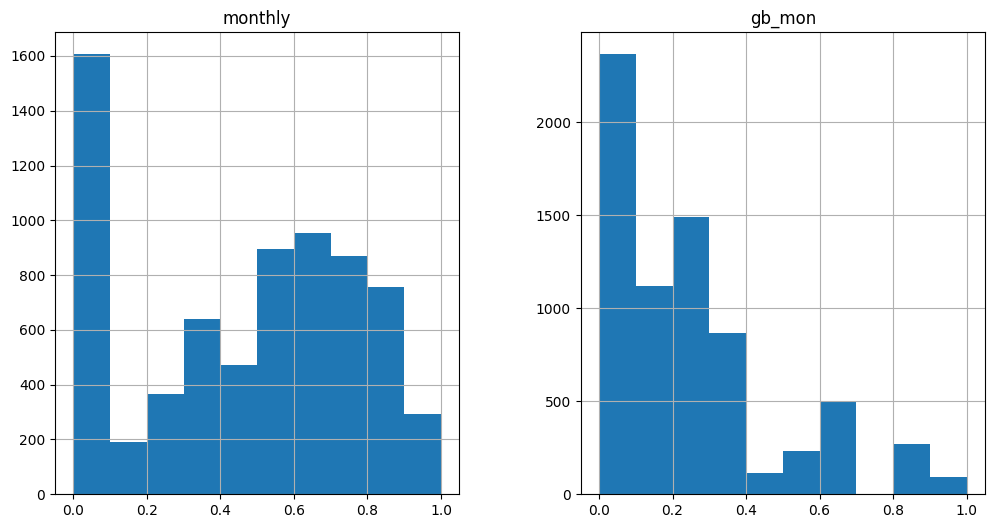

In [19]:
df[numeric_variables].hist(figsize=(12, 6));

###3_8. Convert the 'months' numerical columns into categorical intervals or bins

In [20]:
df['months'] =pd.cut(df['months'], bins=5)

**3_8. Explanation**
The code snippet **df['months'] = pd.cut(df['months'], bins=5)** is used to convert a numerical column named 'months' in a DataFrame df into categorical intervals or bins.

Let's break down the code:

**df['months']**: This part selects the column named 'months' from the DataFrame df. It represents the column containing numerical values that you want to convert into categorical intervals.

pd.cut(...): The pd.cut() function from the pandas library is used to cut the selected column into specified bins or intervals.

**df['months'], bins=5**: Here, the resulting categorical intervals are assigned back to the column 'months' in the DataFrame df. The parameter bins=5 specifies that the column should be divided into 5 equal-width bins or intervals.

The **pd.cut()** function assigns each value in the 'months' column to the corresponding interval based on its value. The intervals are created such that they divide the range of the column's values into equal-width bins. Each bin represents a specific range of values, and the values in the 'months' column are mapped to the corresponding bin based on their value.

For example, if the 'months' column originally had values ranging from 0 to 50, the **pd.cut() function would divide this range into 5 equal-width bins, such as [0-10), [10-20), [20-30), [30-40), and [40-50).** Each value in the 'months' column would then be assigned to the respective bin based on its value.

By assigning the resulting categorical intervals back to the 'months' column in the DataFrame df, you are effectively converting the numerical column into a categorical variable with specific intervals or bins.

Note that the specific binning strategy and interval range may vary based on the data and the parameters you provide to the pd.cut() function